In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [4]:
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14


In [5]:
print(f"train dataset shape: {train.shape}")
print(f"test dataset shape: {test.shape}")

train dataset shape: (44638, 29)
test dataset shape: (23525, 28)


In [6]:
df = train.copy()

<h1>Data cleaning</h1>

In [7]:
def remove_outliers(df, columns, threshold=1.5):
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [8]:
df = remove_outliers(df, ['lead_time', 'total_of_special_requests'])

In [9]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (42335, 29)


In [10]:
drop_features = ['arrival_date_year',
                 'arrival_date_month',
                 'arrival_date_week_number',
                 'arrival_date_day_of_month',
                 'stays_in_weekend_nights',
                 'stays_in_week_nights',
                 'adults',
                 'children',
                 'babies',
                 'country',
                 'distribution_channel',
                 'is_repeated_guest',
                 'previous_cancellations',
                 'previous_bookings_not_canceled',
                 'reserved_room_type',
                 'assigned_room_type',
                 'booking_changes',
                 'days_in_waiting_list',
                 'adr',
                 'required_car_parking_spaces',
                 'reservation_status_date']

df = df.drop(columns=drop_features)
df.head()

,hotel,is_canceled,lead_time,meal,market_segment,deposit_type,customer_type,total_of_special_requests
0,Resort Hotel,0,3,BB,Direct,No Deposit,Transient,0
1,City Hotel,1,50,BB,Online TA,No Deposit,Transient,2
3,City Hotel,0,18,BB,Online TA,No Deposit,Transient,0
4,City Hotel,1,263,BB,Online TA,No Deposit,Transient,0
5,Resort Hotel,0,45,HB,Groups,No Deposit,Transient,1


<h1>Encode categorical feature</h1>

<h2>Binary data</h2>

In [11]:
# hotel
df['hotel'] = df['hotel'].map({'City Hotel':0, 'Resort Hotel':1})

<h2>Ordinal data</h2>

In [12]:
# deposit_type
df['deposit_type'] = df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})

<h2>Nominal data</h2>

In [13]:
# meal, market_segment, customer_type
df = pd.get_dummies(df, columns=['meal', 'market_segment','customer_type'], dtype=int)

In [14]:
df.head()

,hotel,is_canceled,lead_time,deposit_type,total_of_special_requests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,...,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,3,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,50,0,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,18,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,263,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,1,0,45,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
# drop highly correlated column
df = df.drop(columns='customer_type_Transient-Party')

<h1>Feature extraction</h1>

In [16]:
# convert date columns to datetime format
train['reservation_status_date'] = pd.to_datetime(train.reservation_status_date, format='%Y-%m-%d').dt.date
train['arrival_date'] = pd.to_datetime(train.arrival_date_year.map(str) + '/' + train.arrival_date_month + '/' + train.arrival_date_day_of_month.map(str), format='%Y/%B/%d').dt.date

In [17]:
# add is_checked_out feature
for idx in train.index:
    if train.loc[idx,'reservation_status_date'] <= train.loc[idx,'arrival_date']:
        df.loc[idx,'is_checked_out'] = 0
    else:
        df.loc[idx,'is_checked_out'] = 1

df['is_checked_out'] = df['is_checked_out'].astype(int)

In [18]:
# add room_changed feature
for idx in train.index:
    if train.loc[idx,'reserved_room_type'] == train.loc[idx,'assigned_room_type']:
        df.loc[idx,'room_changed'] = 0
    else:
        df.loc[idx,'room_changed'] = 1

df['room_changed'] = df['room_changed'].astype(int)

posx and posy should be finite values
posx and posy should be finite values


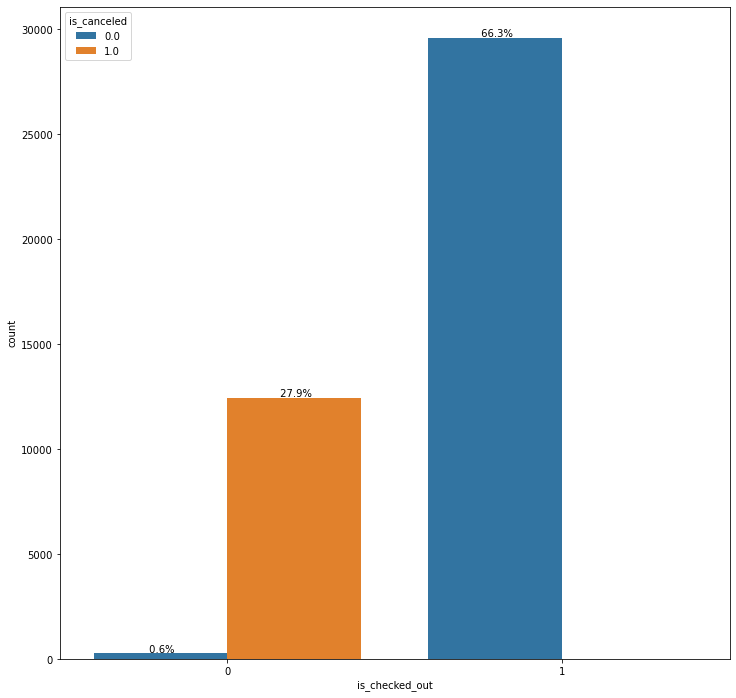

In [19]:
# is_checked_out
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='is_checked_out', data=df, hue='is_canceled')

for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(train)*0.001,
               s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
               ha = 'center')
    
plt.show()

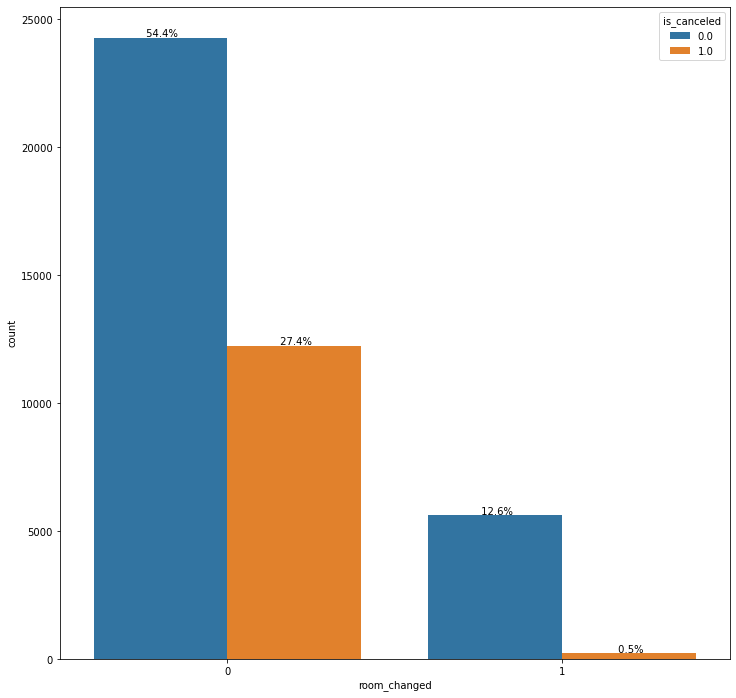

In [20]:
# room_changed
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='room_changed', data=df, hue='is_canceled')

for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(train)*0.001,
               s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
               ha = 'center')
    
plt.show()

<h1>Feature selection</h1>

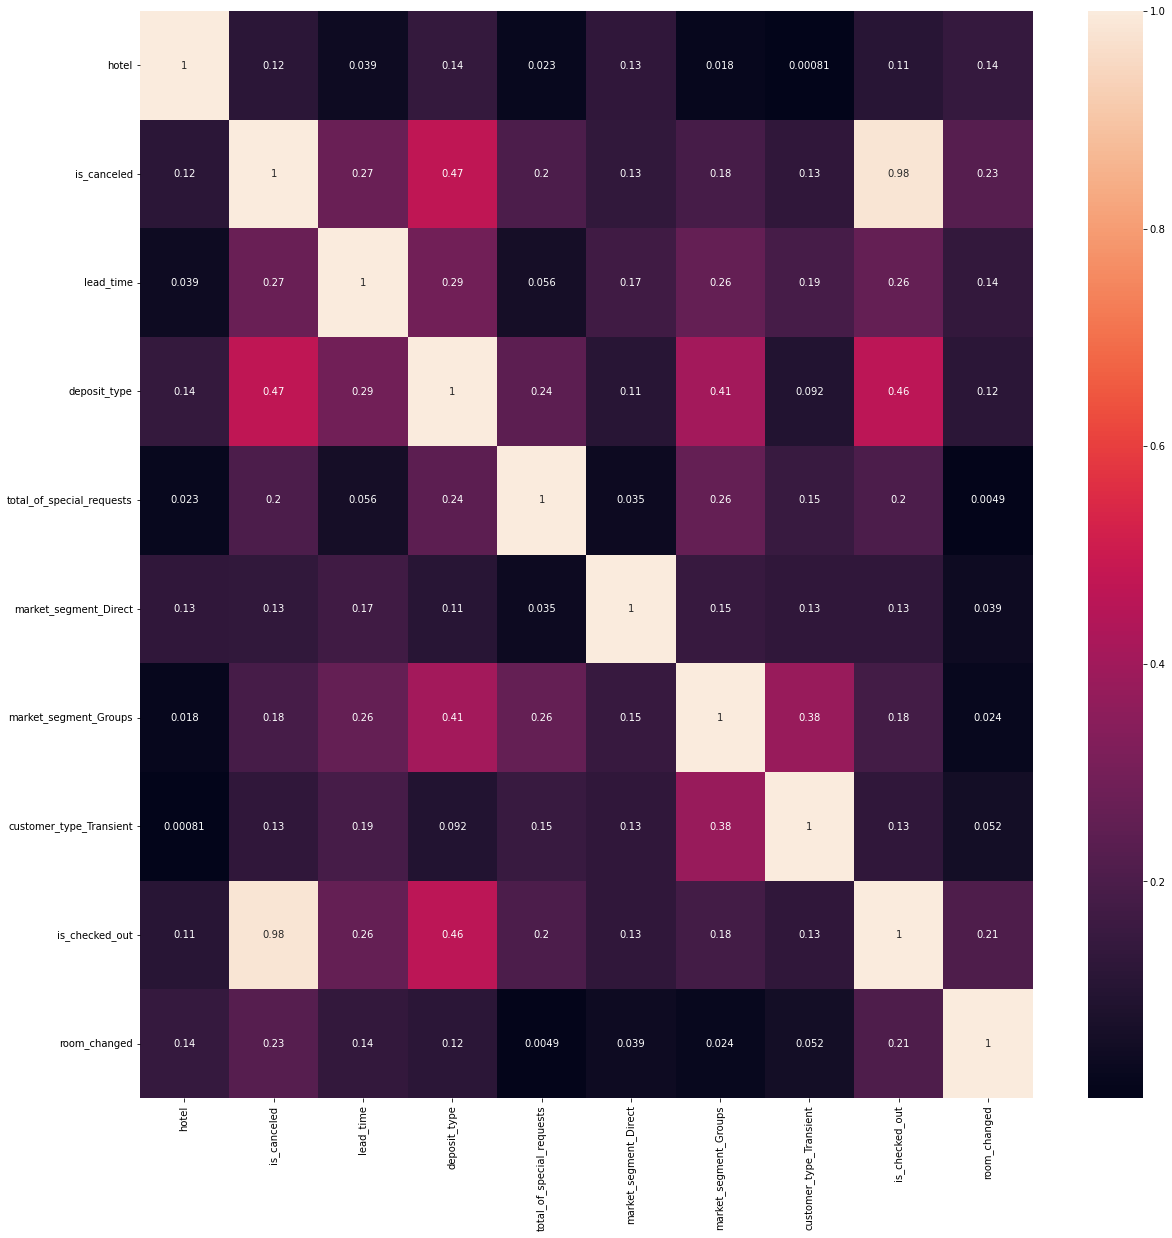

In [21]:
# plot the correlation heatmap for the columns which has correlation value more than 0.1
correlation = df.corr()
correlated_features = correlation.index[abs(correlation['is_canceled']) > 0.1]

plt.figure(figsize=(20, 20))
corr_heatmap = sns.heatmap(df[correlated_features].corr().abs(), annot=True)

In [22]:
selected_features = ['hotel',
                     'is_canceled',
                     'lead_time',
                     'deposit_type',
                     'total_of_special_requests',
                     'market_segment_Groups',
                     'customer_type_Transient',
                     'is_checked_out',
                     'room_changed']

<h1>Data Preparation</h1>

In [23]:
def preprocessing(df, train=True):

    # drop unnecessary features
    drop_features = ['stays_in_weekend_nights',
                     'stays_in_week_nights',
                     'adults',
                     'children',
                     'babies',
                     'country',
                     'distribution_channel',
                     'is_repeated_guest',
                     'previous_cancellations',
                     'previous_bookings_not_canceled',
                     'booking_changes',
                     'days_in_waiting_list',
                     'adr',
                     'required_car_parking_spaces']

    df = df.drop(columns=drop_features)
    
    # encode categorical features
    df['hotel'] = df['hotel'].map({'City Hotel':0, 'Resort Hotel':1})
    df['deposit_type'] = df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
    df = pd.get_dummies(df, columns=['meal', 'market_segment', 'customer_type'], dtype=int)
    
    # add features
    df['reservation_status_date'] = pd.to_datetime(df.reservation_status_date, format='%Y-%m-%d').dt.date
    df['arrival_date'] = pd.to_datetime(df.arrival_date_year.map(str) + '/' + df.arrival_date_month + '/' + df.arrival_date_day_of_month.map(str), format='%Y/%B/%d').dt.date
    
    for idx in df.index:
        if df.loc[idx,'reservation_status_date'] <= df.loc[idx,'arrival_date']:
            df.loc[idx,'is_checked_out'] = 0
        else:
            df.loc[idx,'is_checked_out'] = 1

    df['is_checked_out'] = df['is_checked_out'].astype(int)

    for idx in df.index:
        if df.loc[idx,'reserved_room_type'] == df.loc[idx,'assigned_room_type']:
            df.loc[idx,'room_changed'] = 0
        else:
            df.loc[idx,'room_changed'] = 1
            
    df['room_changed'] = df['room_changed'].astype(int)
    
    df.drop(columns=['arrival_date_year', 
                     'arrival_date_month', 
                     'arrival_date_week_number', 
                     'arrival_date_day_of_month', 
                     'reserved_room_type', 
                     'assigned_room_type', 
                     'reservation_status_date', 
                     'arrival_date'])
    
    # collect selected features
    selected_features = ['hotel',
                         'is_canceled',
                         'lead_time',
                         'deposit_type',
                         'total_of_special_requests',
                         'market_segment_Groups',
                         'customer_type_Transient',
                         'is_checked_out',
                         'room_changed']
    
    if train:
        df = df[selected_features]
        df = remove_outliers(df, ['total_of_special_requests'])
    else:
        selected_features.remove('is_canceled')
        df = df[selected_features]
    
    return df

In [24]:
train, test = preprocessing(train), preprocessing(test, False)

In [25]:
train.head()

,hotel,is_canceled,lead_time,deposit_type,total_of_special_requests,market_segment_Groups,customer_type_Transient,is_checked_out,room_changed
0,1,0,3,0,0,0,1,1,1
1,0,1,50,0,2,0,1,0,0
3,0,0,18,0,0,0,1,1,0
4,0,1,263,0,0,0,1,0,0
5,1,0,45,0,1,1,1,1,1


In [26]:
test.head()

,hotel,lead_time,deposit_type,total_of_special_requests,market_segment_Groups,customer_type_Transient,is_checked_out,room_changed
0,0,73,0,0,0,1,0,0
1,0,37,0,0,0,1,1,0
2,0,190,0,0,0,1,0,0
3,0,287,0,0,0,1,1,0
4,1,386,0,0,1,0,0,0


In [27]:
print(f"train dataset shape: {train.shape}")
print(f"test dataset shape: {test.shape}")

train dataset shape: (43490, 9)
test dataset shape: (23525, 8)


In [28]:
train.to_csv('train_final.csv', index=False)
test.to_csv('test_final.csv', index=False)